# Chapter 10: Predicting Continuous Target Variables with Regression Analysis

My own scratch as I play along, see real deal [at the author's github](https://github.com/rasbt/python-machine-learning-book/tree/master/code/ch10).

## Loading the housing dataset.

Source: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [1]:
import pandas as pd

df = pd.read_csv('housing.data', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Scatter matrix 

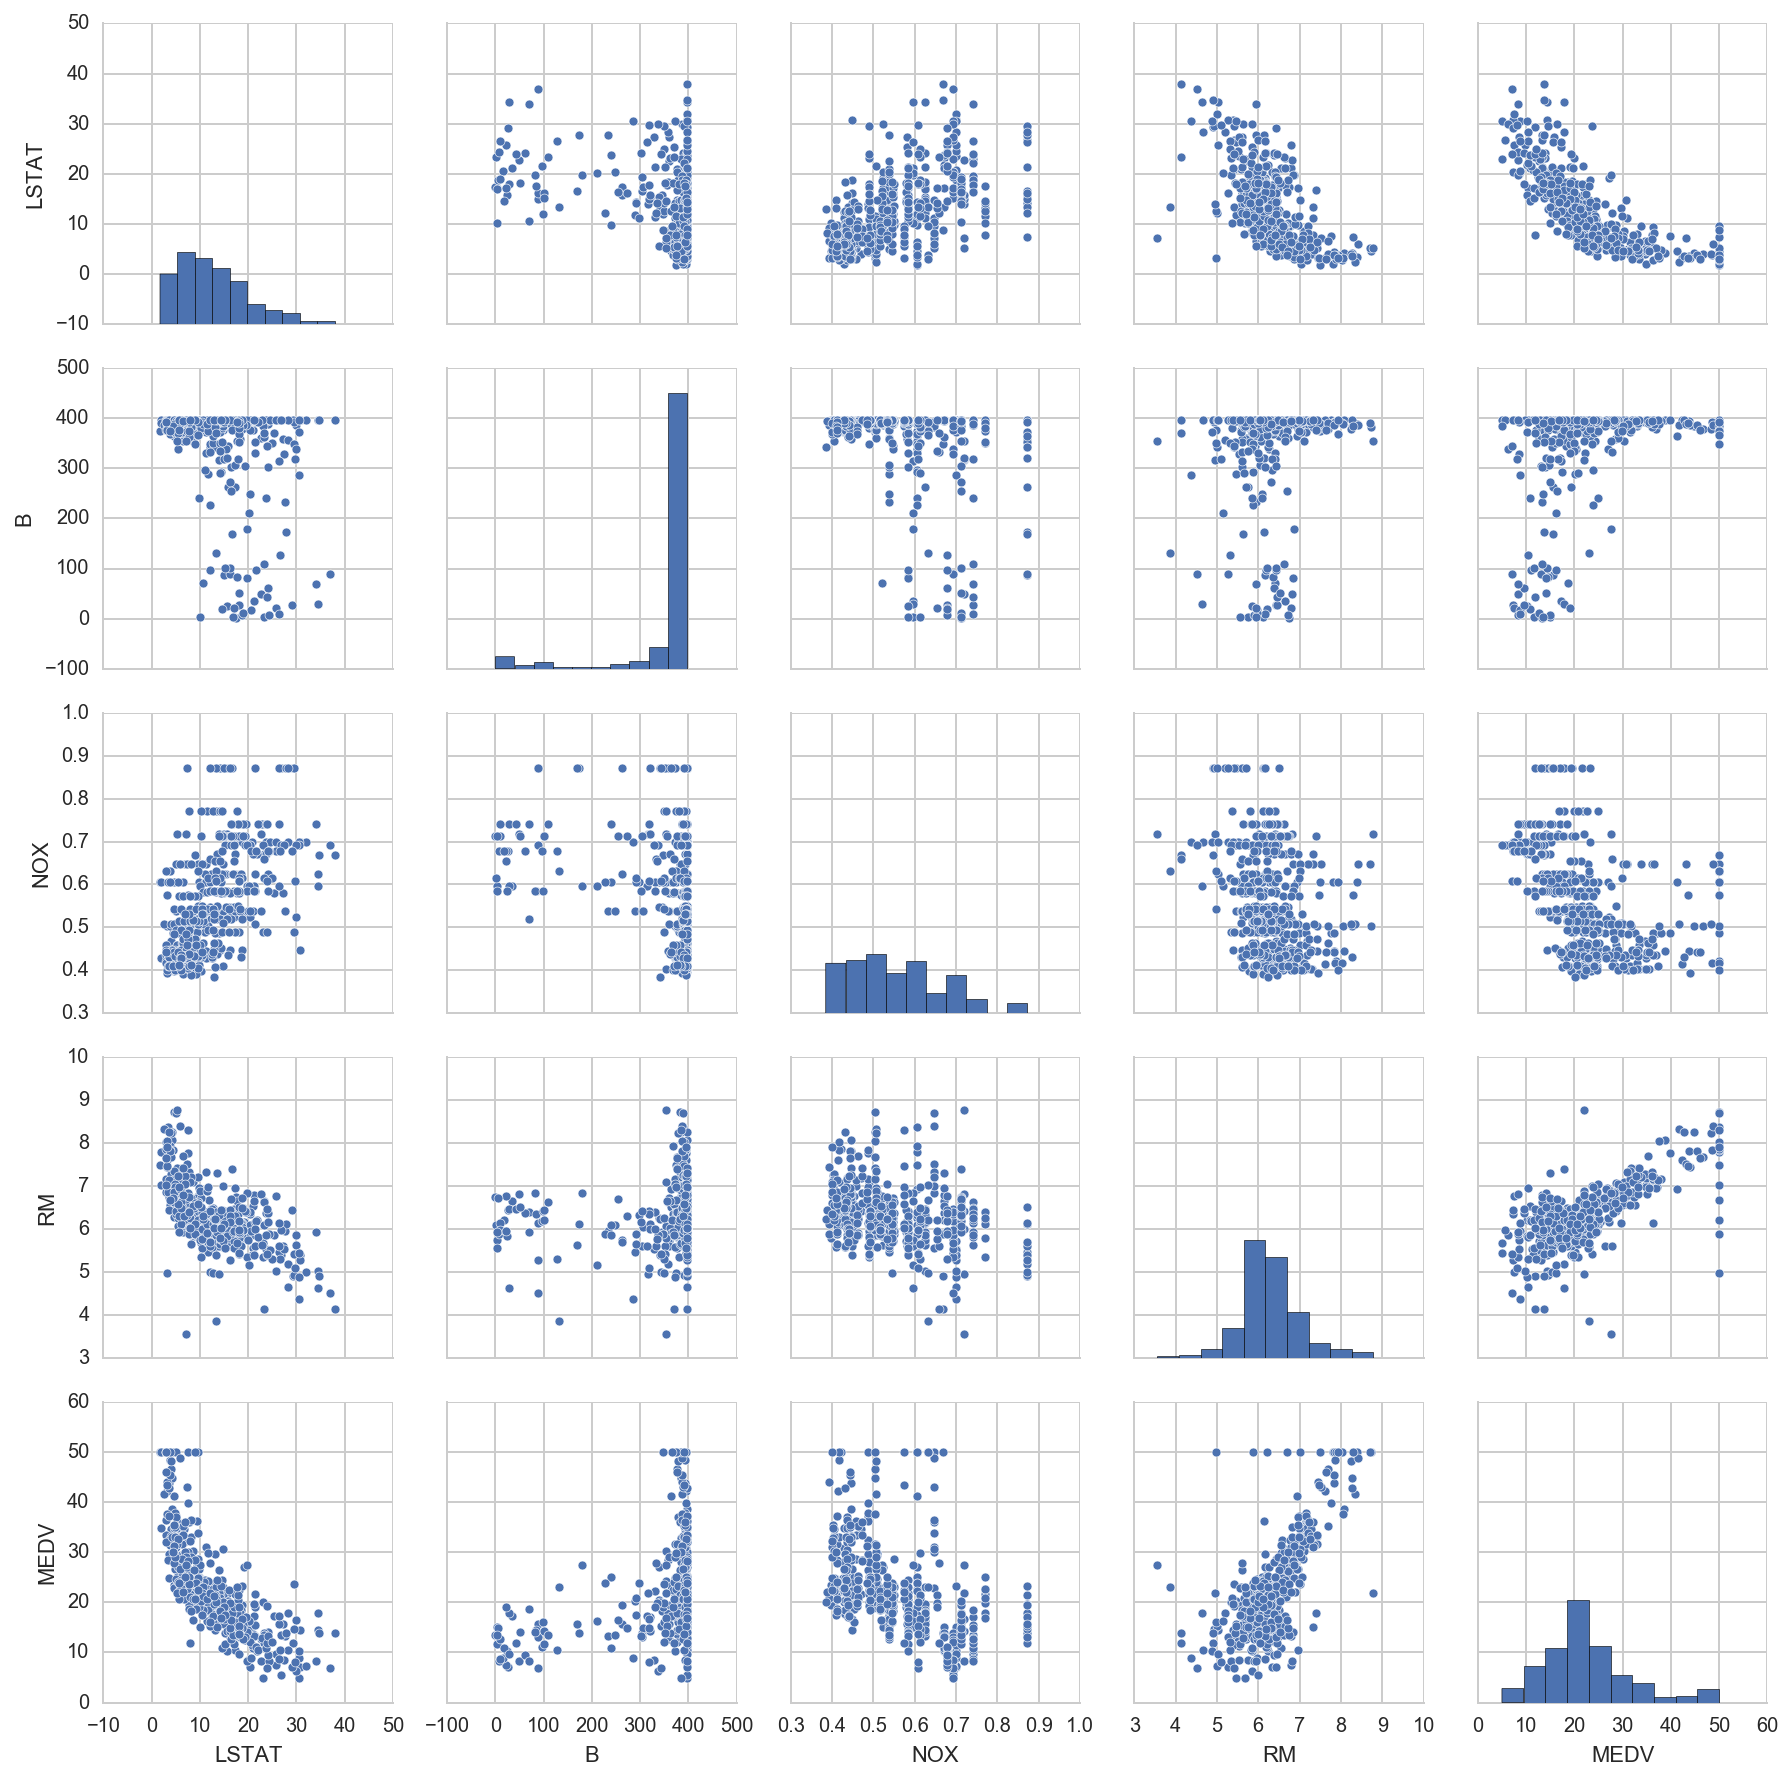

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style='whitegrid', context='notebook')

cols = ['LSTAT', 'B', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.savefig('scatter.png', dpi=300)

plt.show()


## Correlation matrix

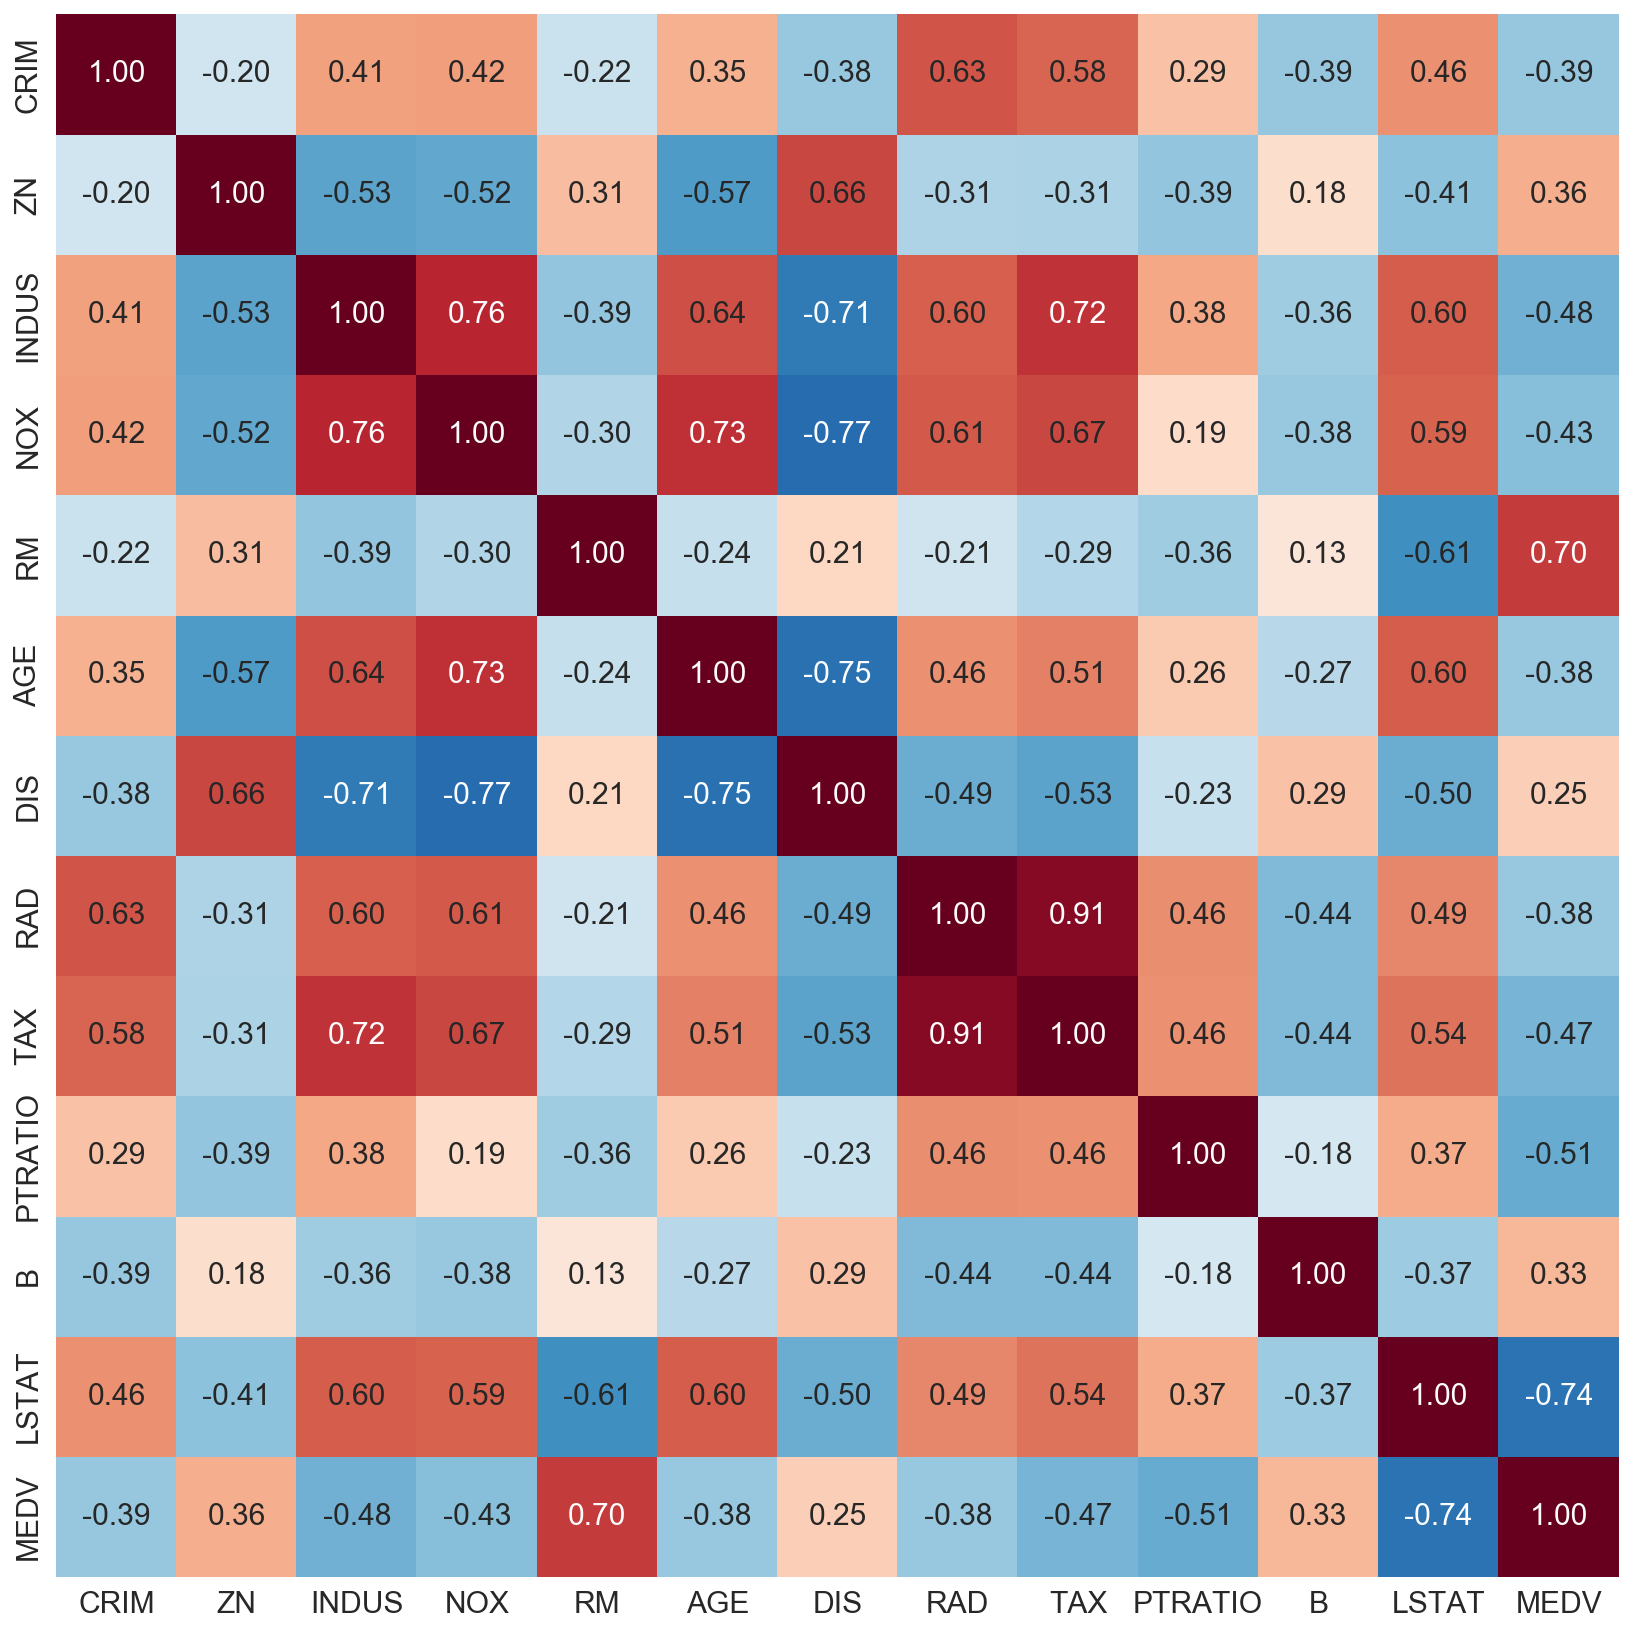

In [3]:
import numpy as np

corr_cols = ['CRIM', 'ZN', 'INDUS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

cm = np.corrcoef(df[corr_cols].values.T)
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(14, 14))

hm = sns.heatmap(cm,
                 ax=ax,
                 cbar=False,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=corr_cols,
                 xticklabels=corr_cols)
# plt.savefig('corr_mat.png', dpi=300)

plt.show()

## Single variable regression adapting Adeline

LTAT and RM are the most correlated with our response variable MEDV. Between these two, RM has more of a linear relationship, so we'll use that to explore single variable regression.

We essentially already implemented linear regression back in chapter 2, we just need to use the net_input function directly without activating it to push it to 0 or 1.

In [4]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)


In [5]:
X = df[['RM']].values
y = df['MEDV'].values

We need to scale the values.

In [6]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

/Users/krosaen/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/krosaen/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [7]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

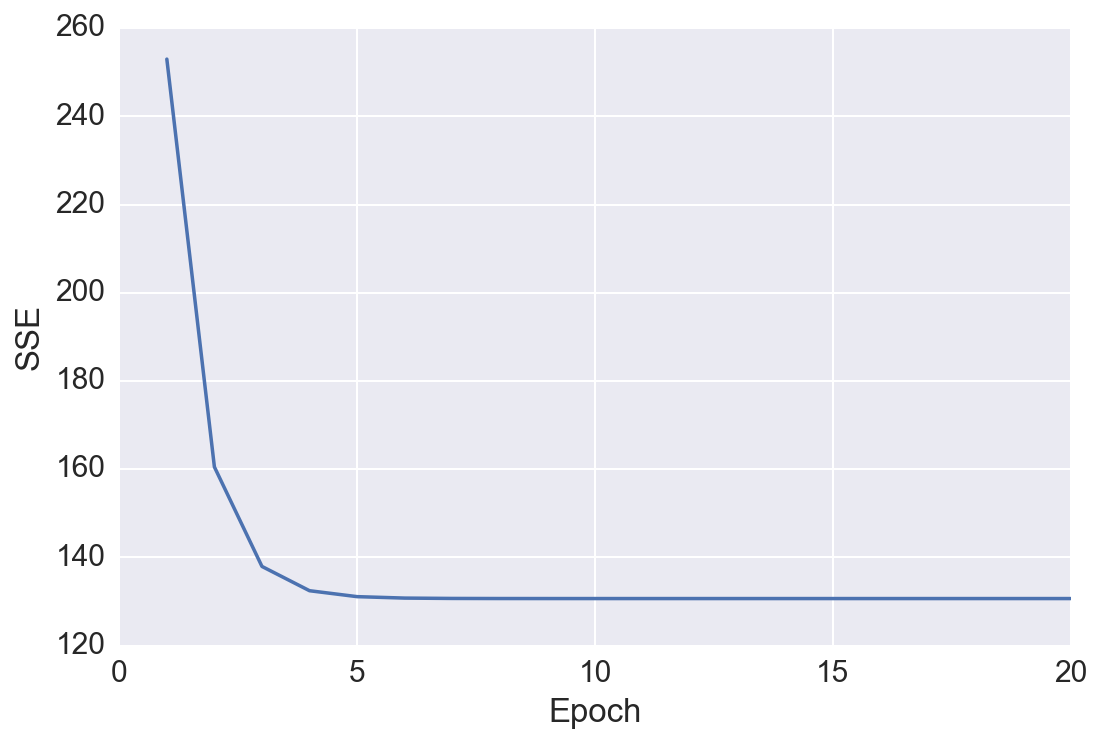

In [8]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [9]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

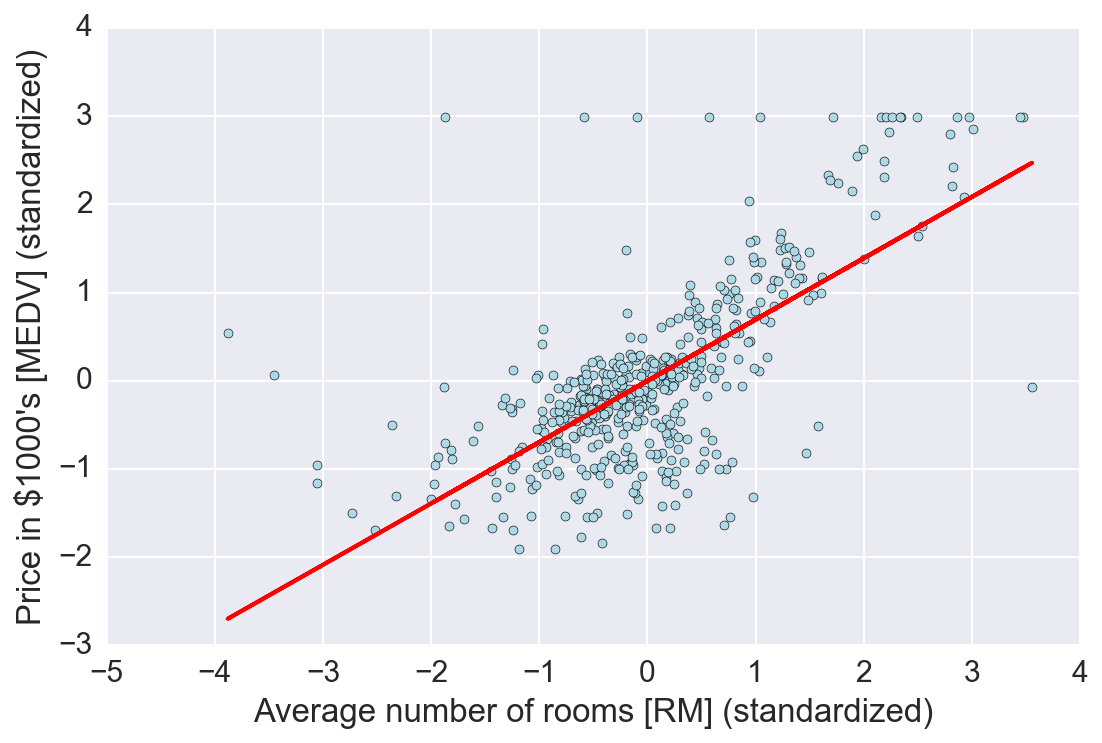

In [10]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
plt.show()

In [11]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


Note that the intercept on a standardized dataset is always zero

### Inverting standard scaled predictions to get original scale

In [12]:
num_rooms_std = sc_x.transform([[5.0]])[0] 
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


## Doing the same in scikit-learn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


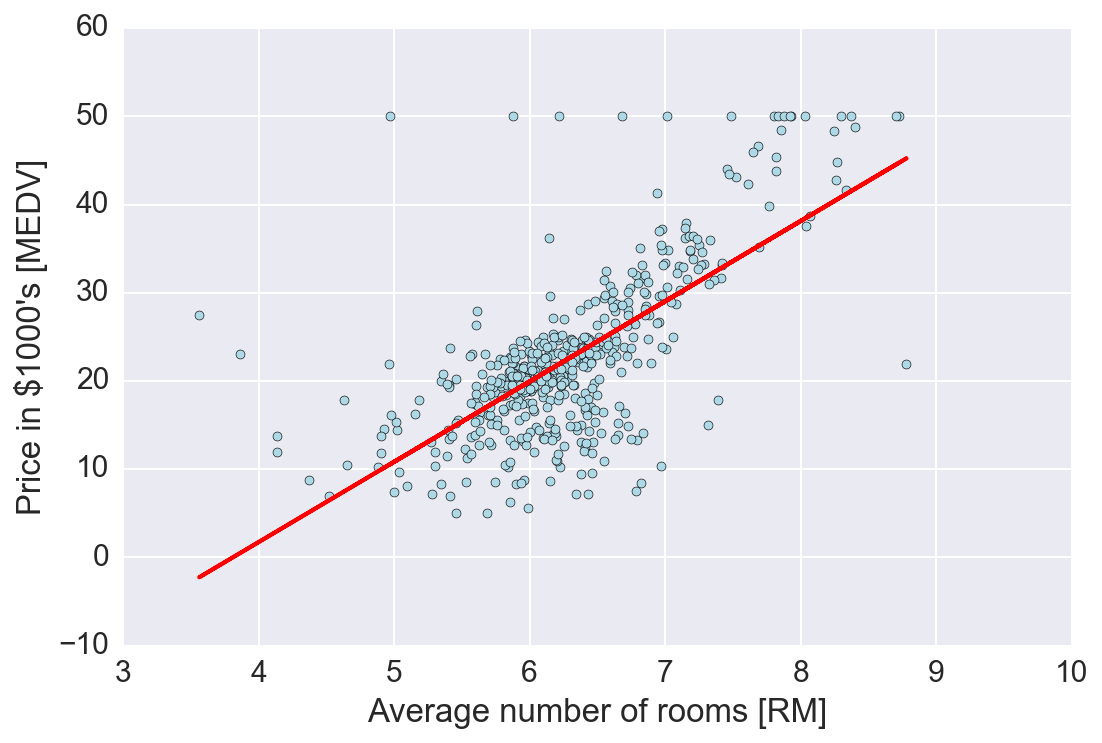

In [15]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

In [16]:
print("Price in $1000's for 5 bedroom: %.3f" % slr.predict([[5]])[0])

Price in $1000's for 5 bedroom: 10.840


## Using RANSAC

RANSAC aims to reduce the effect of ouliers by iteratively randomly selecting a subset, assuming they are 'inliers' and then selecting all other points that are within a threshold of the fitted line:

1. Select a random number of samples to be inliers and fit the model.
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
3. Re fit the model using all inliers.
4. Estimate the error of the fitted model versus the inliers.
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations has been reached; go back to step 1 otherwise.

One disadvantage is the metric for deciding whether points are within the threshold is dataset dependent, as the book describes:

> Using the residual_metric parameter, we provided a callable lambda function that simply calculates the absolute vertical distances between the fitted line and the sample points. By setting the residual_threshold parameter to 5.0, we only allowed samples to be included in the inlier set if their vertical distance to the fit line is within 5 distance units, which works well on this particular dataset. By default, scikit-learn uses the MAD estimate to select the inlier threshold, where MAD stands for the Median Absolute Deviation of the target values y. However, the choice of an appropriate value for the inlier threshold is problem-specific, which is one disadvantage of RANSAC.

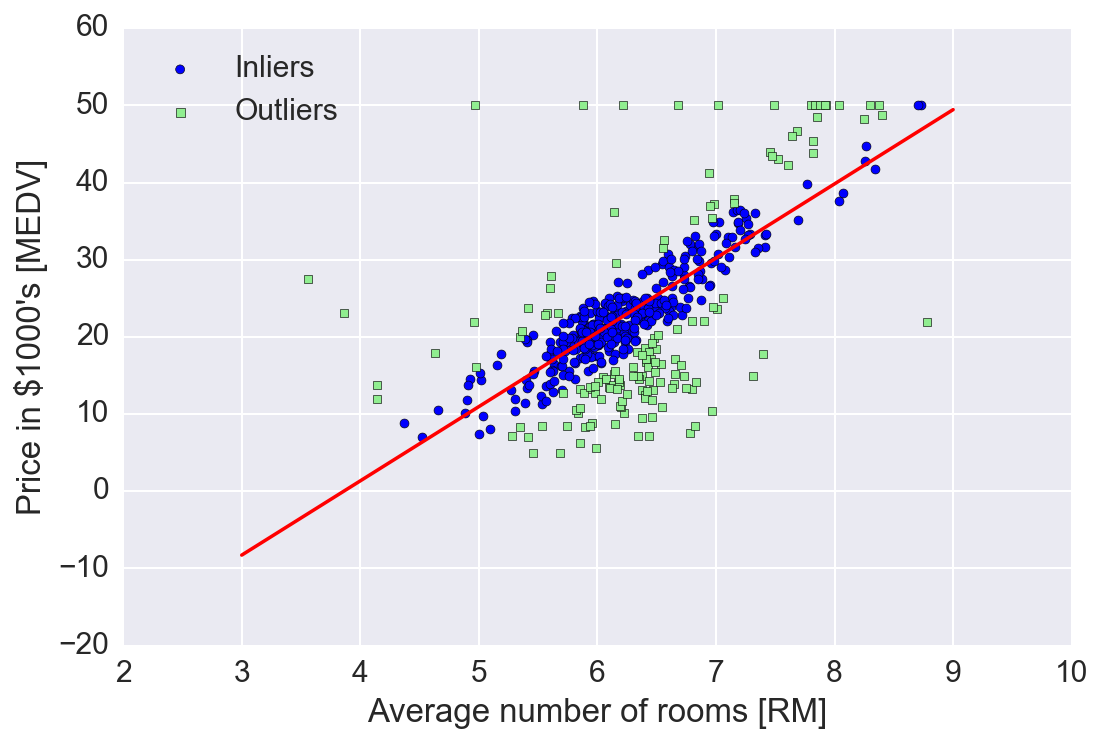

In [17]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Comparing estimated parameters

Note that RANSAC comes up with a slightly different line than the standard linear regression:

In [20]:
print("Standard Linear Regression slope, intercept: {:2f}, {:2f}".format(slr.coef_[0], slr.intercept_))
print("RANSAC Linear Regression slope, intercept: {:2f}, {:2f}".format(ransac.estimator_.coef_[0], ransac.estimator_.intercept_))

Standard Linear Regression slope, intercept: 9.102109, -34.670621
RANSAC Linear Regression slope, intercept: 9.621318, -37.137060


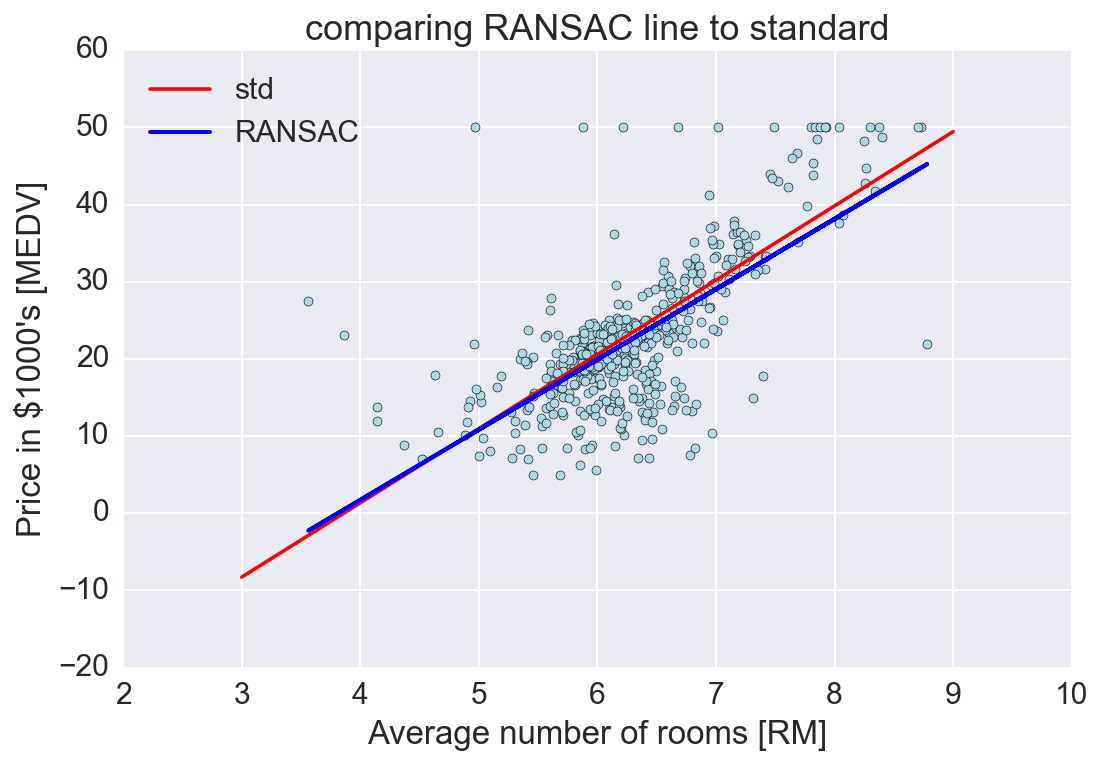

In [24]:
plt.scatter(X, y, c='lightblue', marker='o')
plt.plot(line_X, line_y_ransac, color='red', label='std') 
plt.plot(X, slr.predict(X), color='blue', linewidth=2, label='RANSAC')  
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.title('comparing RANSAC line to standard')
plt.show()

## Evaluating performance

So did RANSAC fit a different line, but does it actually perform any better?

Let's setup an evaluation framework and throw a couple other regression models into the mix while we are at it.

### Train test split

As with classification, we should evaluate our model on data the model didn't see during training



In [26]:
from sklearn.cross_validation import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Training linear model with all variables

We'll make use of all variables instead of just the one.

In [27]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

### Residual plots for multidimensional models

Visualizing a regression hyperplane only works with 1 (line) or 2 (plane) variables; once we start to make use of more variables in a regression, we need a different way to visualize the model's performance. That's where residual plots come in handy: we see how far off the predicted value is from the true value for each datapoint.

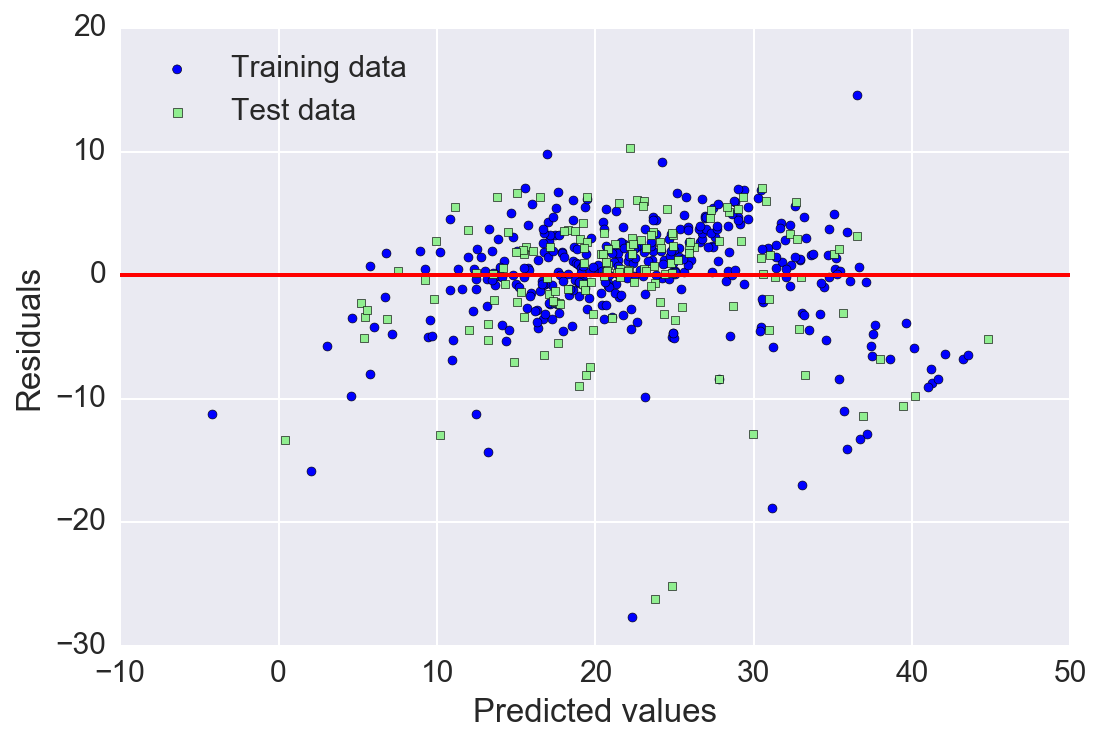

In [28]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

As the book notes

> for a good regression model, we would expect that the errors are randomly distributed and
the residuals should be randomly scattered around the centerline. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which is leaked into the residuals as we can slightly see in our preceding residual plot. Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline.

### Score



In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [30]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


### Evaluating multiple models

Unlike the book, let's clean things up and use some pipelies as necessary (polynomial transofmration) to make comparing multiple models easier.


In [32]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [51]:
models = [
    ('LR', slr), 
    ('RANSAC', ransac),
    ('Lasso', linear_model.Lasso(alpha=0.1)),
    ('Ridge', linear_model.Ridge(alpha = 0.1)),
    ('ElasticNet', linear_model.ElasticNet(alpha = 0.1)),
    ('Quatratic', Pipeline([
                ('polyxform', PolynomialFeatures(degree=2)),
                ('lr', LinearRegression())
            ])),
    ('Cubic', Pipeline([
                ('polyxform', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())
            ])),
    ('Decision Tree', DecisionTreeRegressor(max_depth=3)),
    ('Random Forest', RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)),
    
]

In [53]:
r2s = {}
for label, model in models:
    model.fit(X_train, y_train)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    r2s[label] = (r2_train, r2_test)
    print('{} R2 scores (train/test): {:2f}/{:2f}'.format(label, r2_train, r2_test))


LR R2 scores (train/test): 0.764545/0.673383
RANSAC R2 scores (train/test): 0.722514/0.595687
Lasso R2 scores (train/test): 0.753127/0.653209
Ridge R2 scores (train/test): 0.764475/0.672546
ElasticNet R2 scores (train/test): 0.751682/0.652375
Quatratic R2 scores (train/test): 0.951138/0.652489
Cubic R2 scores (train/test): 1.000000/-1030.784778
Decision Tree R2 scores (train/test): 0.851129/0.662887
Random Forest R2 scores (train/test): 0.983379/0.827613


In [65]:
import pandas as pd

df = pd.DataFrame.from_dict(r2s, orient='index')
df.columns = ['train', 'test']
# df['delta'] = df['train'] - df['test']
df.sort_values(by='test', inplace=True, ascending=False)
df

,train,test
Random Forest,0.983379,0.827613
LR,0.764545,0.673383
Ridge,0.764475,0.672546
Decision Tree,0.851129,0.662887
Lasso,0.753127,0.653209
Quatratic,0.951138,0.652489
ElasticNet,0.751682,0.652375
RANSAC,0.722514,0.595687
Cubic,1.000000,-1030.784778


It looks like Random forest is the best, followed by plain old logistic regression. Further tuning the parameters of the regularized models (ridge, lasso, elastic) might improve performance but meh. Funny how badly cubic overfit the data.